In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)

In [ ]:
df=pd.read_csv("UNSW_NB15_training-set.csv")
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
len(df)

82332

In [ ]:
def one_hot_encode(element):
    arr = df[element]
    arr_hm = {}
    unique_arr = list(set(arr))
    for i in range(len(unique_arr)):
        arr_hm[unique_arr[i]]=i
        
    encoded_arr = []
    for i in arr:
        encoded_arr.append(arr_hm[i])
        
    return arr_hm, encoded_arr, unique_arr

In [ ]:
hm_proto, encodes_proto, feature_class_proto = one_hot_encode("proto")
df["encoded_proto"]=encodes_proto
hm_service, encodes_service, feature_class_service = one_hot_encode("service")
df["encoded_service"]=encodes_service
hm_attack_cat, encodes_attack_cat, feature_class_attack_cat = one_hot_encode("attack_cat")
df["encoded_attack_cat"]=encodes_attack_cat

In [ ]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,encoded_proto,encoded_service,encoded_attack_cat
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,0,0,1,2,0,Normal,0,119,7,4
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,0,0,1,2,0,Normal,0,119,7,4
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,0,0,1,3,0,Normal,0,119,7,4
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,0,0,2,3,0,Normal,0,119,7,4
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,0,0,2,3,0,Normal,0,119,7,4


In [ ]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,encoded_proto,encoded_service,encoded_attack_cat
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600,88.418792,5.857637,5.481757
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436,27.747559,2.410211,2.333399
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,70.000000,2.000000,4.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000,70.000000,7.000000,4.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000,119.000000,7.000000,7.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000,130.000000,12.000000,9.000000


In [ ]:
std_limit_vals = ["sbytes", "sload", "dload", "rate", "sinpkt"]

In [ ]:
import math

for feature in std_limit_vals:
    arr=[]
    for i in df[feature]:
        if i==0:
            arr.append(0)
        else:
            arr.append(math.log(i))
            
    df["limited_"+feature]=arr

In [ ]:
selected_features = ["limited_sbytes", "limited_sload", "dmean", "ct_dst_sport_ltm", "dur", "dttl", "ct_dst_src_ltm", "encoded_proto", "ct_src_dport_ltm", "limited_dload", "dinpkt", "ct_src_ltm", "tcprtt", "smean", "dbytes", "limited_rate", "ct_srv_dst", "ct_state_ttl", "encoded_service", "ct_srv_src", "sttl", "dpkts", "ct_dst_ltm", "limited_sinpkt", "synack"]

In [ ]:
filtered_dataset=df[selected_features]

In [ ]:
filtered_dataset.head()

,limited_sbytes,limited_sload,dmean,ct_dst_sport_ltm,dur,dttl,ct_dst_src_ltm,encoded_proto,ct_src_dport_ltm,limited_dload,...,limited_rate,ct_srv_dst,ct_state_ttl,encoded_service,ct_srv_src,sttl,dpkts,ct_dst_ltm,limited_sinpkt,synack
0,6.206576,19.010486,0,1,0.000011,0,2,119,1,0.0,...,11.417615,2,2,7,2,254,0,1,-4.509860,0.0
1,7.474205,20.596568,0,1,0.000008,0,2,119,1,0.0,...,11.736069,2,2,7,2,254,0,1,-4.828314,0.0
2,6.973543,20.565910,0,1,0.000005,0,3,119,1,0.0,...,12.206073,3,2,7,3,254,0,1,-5.298317,0.0
3,6.802395,20.212440,0,1,0.000006,0,3,119,2,0.0,...,12.023751,3,2,7,3,254,0,2,-5.115996,0.0
4,7.661998,20.561217,0,1,0.000010,0,3,119,2,0.0,...,11.512925,3,2,7,3,254,0,2,-4.605170,0.0


In [ ]:
filtered_dataset.describe()

,limited_sbytes,limited_sload,dmean,ct_dst_sport_ltm,dur,dttl,ct_dst_src_ltm,encoded_proto,ct_src_dport_ltm,limited_dload,...,limited_rate,ct_srv_dst,ct_state_ttl,encoded_service,ct_srv_src,sttl,dpkts,ct_dst_ltm,limited_sinpkt,synack
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,6.310668,13.583649,116.275069,3.663011,1.006756,95.713003,7.456360,88.418792,4.928898,5.845969,...,7.463143,9.164262,1.369273,5.857637,9.546604,180.967667,17.545936,5.744923,-0.343692,0.029256
std,1.616872,4.550029,244.600271,5.915386,4.710444,116.667722,11.415191,27.747559,8.389545,5.593160,...,4.182790,11.121413,1.067188,2.410211,11.090289,101.513358,115.574086,8.418112,4.621786,0.070854
min,3.178054,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,-4.094325,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-6.907755,0.000000
25%,4.736198,9.323889,0.000000,1.000000,0.000008,0.000000,1.000000,70.000000,1.000000,0.000000,...,3.353620,2.000000,1.000000,2.000000,2.000000,62.000000,0.000000,1.000000,-4.828314,0.000000
50%,6.280396,13.265603,44.000000,1.000000,0.014138,29.000000,3.000000,70.000000,1.000000,7.655841,...,7.882382,5.000000,1.000000,7.000000,5.000000,254.000000,2.000000,2.000000,-0.531182,0.000441
75%,7.154615,17.992093,87.000000,3.000000,0.719360,252.000000,6.000000,119.000000,4.000000,9.671435,...,11.618286,11.000000,2.000000,7.000000,11.000000,254.000000,10.000000,6.000000,4.149613,0.052596
max,16.479663,22.384917,1500.000000,38.000000,59.999989,253.000000,63.000000,130.000000,59.000000,16.851478,...,13.815511,62.000000,6.000000,12.000000,63.000000,255.000000,11018.000000,59.000000,11.002266,3.226788


In [ ]:
X=np.array(filtered_dataset)
Y=np.array(df["encoded_attack_cat"])

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.05)

## Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
Y_pred = log_reg.predict(X_test)

print("Accuracy of Logistic Regression Model:", log_reg.score(X_test, Y_test))
print("Precision Score of Logistic Regression Model:", precision_score(Y_test, Y_pred, average="micro"))
print("Recall Score of Logistic Regression Model:", recall_score(Y_test, Y_pred, average="micro"))

Accuracy of Logistic Regression Model: 0.6191401505950935
Precision Score of Logistic Regression Model: 0.6191401505950935
Recall Score of Logistic Regression Model: 0.6191401505950935


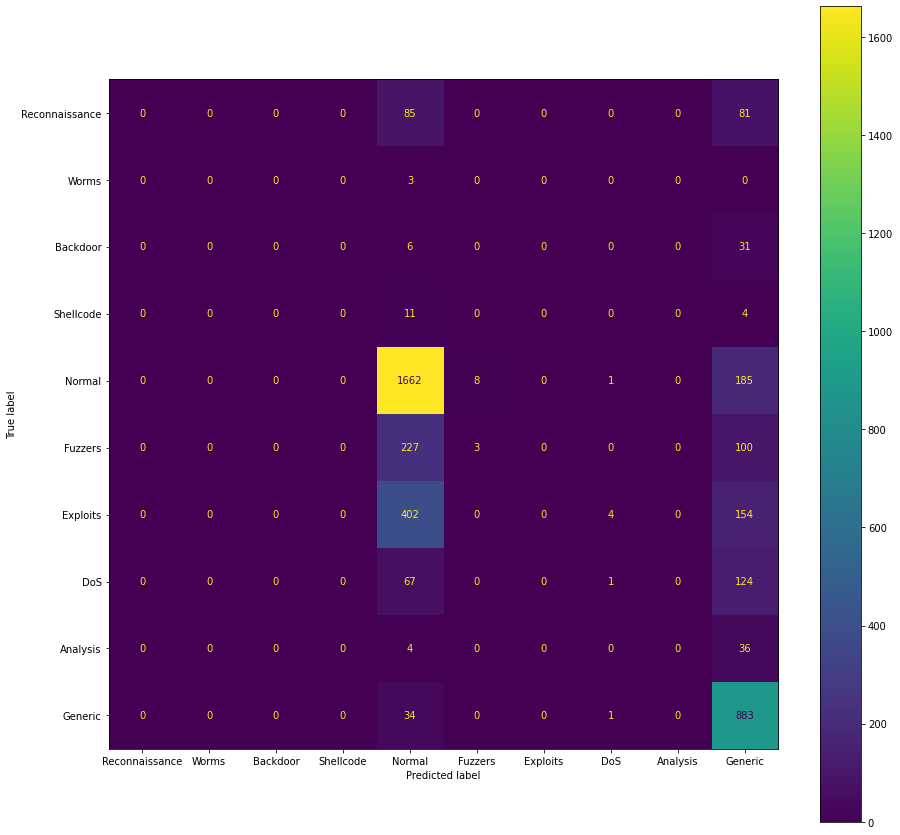

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm_model=SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred = svm_model.predict(X_test)

print("Accuracy of Support Vector Machine Model:", svm_model.score(X_test, Y_test))
print("Precision Score of Support Vector Machine Model:", precision_score(Y_test, Y_pred,average="micro"))
print("Recall Score of Support Vector Machine Model:", recall_score(Y_test, Y_pred,average="micro"))

Accuracy of Support Vector Machine Model: 0.45324265241680833
Precision Score of Support Vector Machine Model: 0.45324265241680833
Recall Score of Support Vector Machine Model: 0.45324265241680833


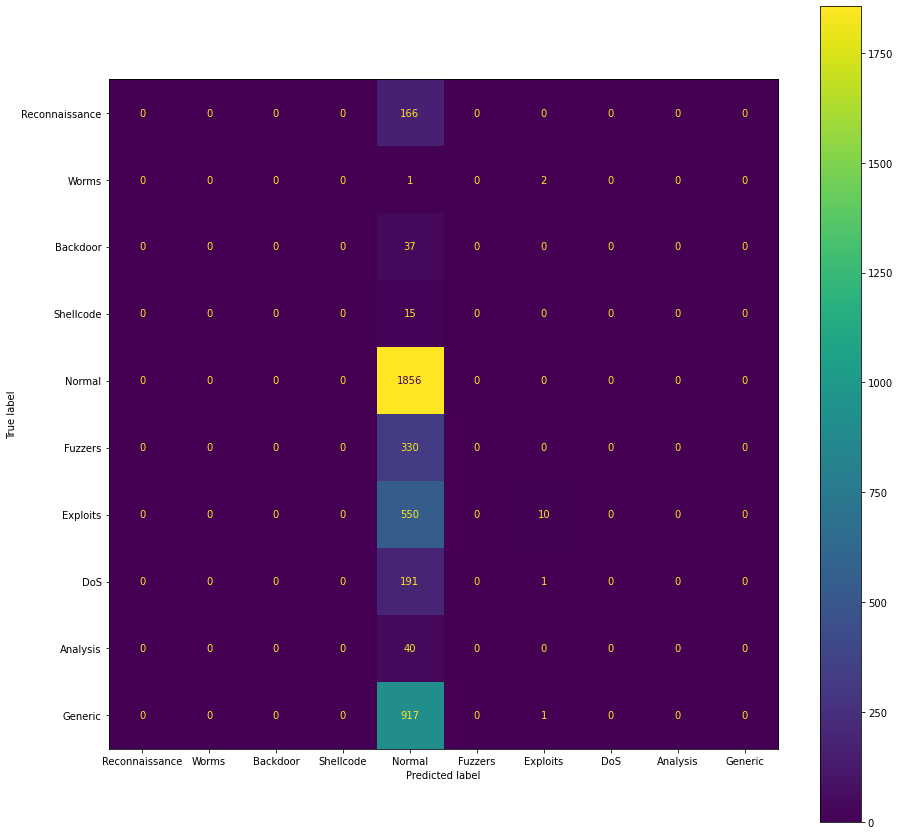

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

## Decision Tree Classfier (DT)

In [ ]:
from sklearn import tree

dtc=tree.DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = dtc.predict(X_test)

print("Accuracy of Decision Tree Classifier Model:", dtc.score(X_test, Y_test))
print("Precision Score of Decision Tree Classifier Model:", precision_score(Y_test, Y_pred,average="micro"))
print("Recall Score of Decision Tree Classifier Model:", recall_score(Y_test, Y_pred,average="micro"))

Accuracy of Decision Tree Classifier Model: 0.8496478017974253
Precision Score of Decision Tree Classifier Model: 0.8496478017974253
Recall Score of Decision Tree Classifier Model: 0.8496478017974253


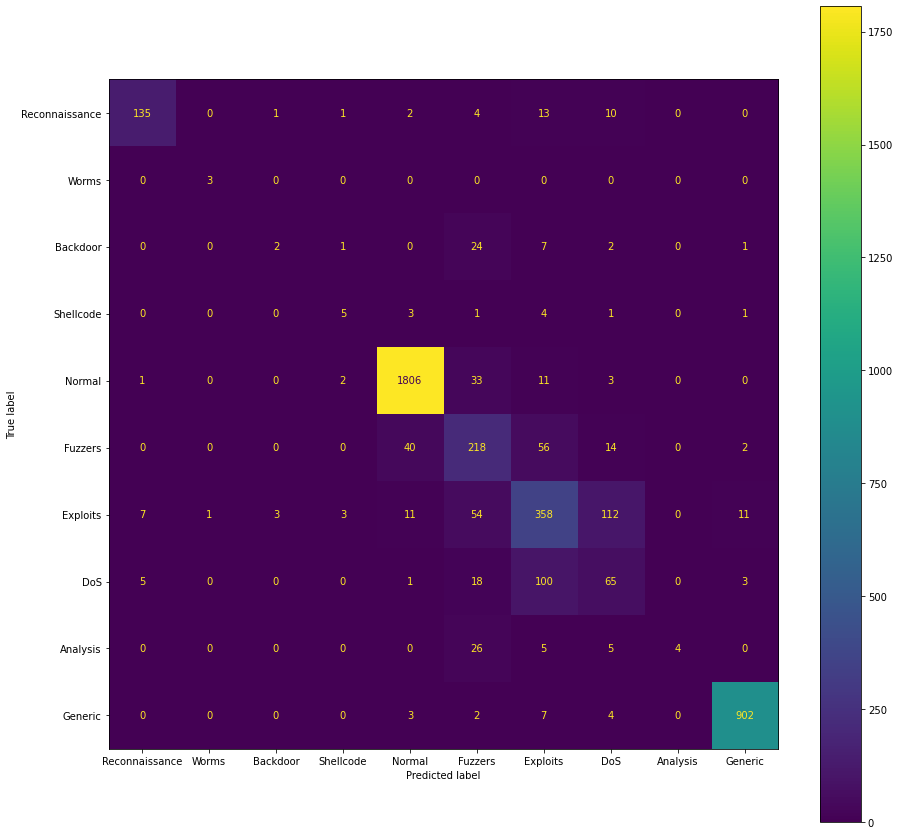

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

## Random Forest Classifier (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred = rf.predict(X_test)

print("Accuracy of Random Forest Classifier Model:", rf.score(X_test, Y_test))
print("Precision Score of Random Forest Classifier Model:", precision_score(Y_test, Y_pred,average="micro"))
print("Recall Score of Random Forest Classifier Model:", recall_score(Y_test, Y_pred,average="micro"))

Accuracy of Random Forest Classifier Model: 0.8656788923973767
Precision Score of Random Forest Classifier Model: 0.8656788923973767
Recall Score of Random Forest Classifier Model: 0.8656788923973767


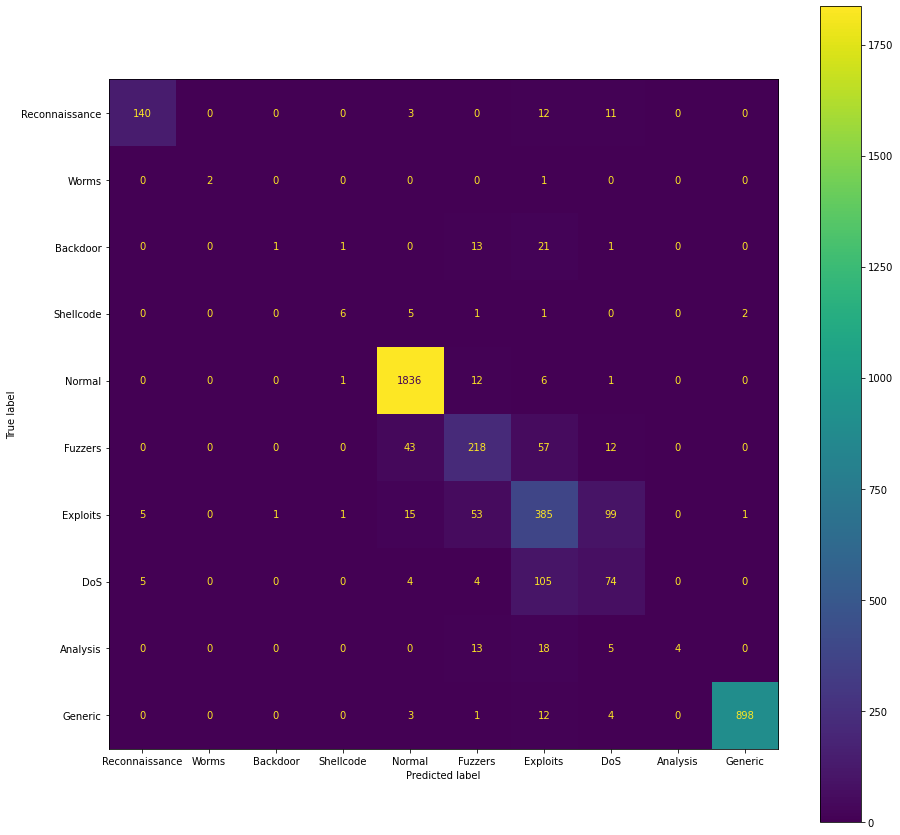

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

## Artificial Neural Network (ANN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

ann=Sequential()
ann.add(Dense(256, input_shape=(len(X_train[0]),), activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(64, activation="relu"))
ann.add(Dropout(0.5))
ann.add(Dense(len(set(Y_train)), activation="softmax"))

ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               6656      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 23,754
Trainable params: 23,754
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history=ann.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
2445/2445 [==============================] - 7s 3ms/step - loss: 137.8586 - accuracy: 0.5344 - val_loss: 1.2161 - val_accuracy: 0.6204
Epoch 2/20
2445/2445 [==============================] - 6s 3ms/step - loss: 1.3531 - accuracy: 0.6557 - val_loss: 0.9650 - val_accuracy: 0.6915
Epoch 3/20
2445/2445 [==============================] - 6s 2ms/step - loss: 1.0374 - accuracy: 0.6876 - val_loss: 0.9157 - val_accuracy: 0.6991
Epoch 4/20
2445/2445 [==============================] - 6s 2ms/step - loss: 0.9443 - accuracy: 0.6969 - val_loss: 0.8863 - val_accuracy: 0.6995
Epoch 5/20
2445/2445 [==============================] - 6s 2ms/step - loss: 0.9106 - accuracy: 0.7017 - val_loss: 0.8662 - val_accuracy: 0.7134
Epoch 6/20
2445/2445 [==============================] - 6s 2ms/step - loss: 0.8980 - accuracy: 0.7079 - val_loss: 0.8596 - val_accuracy: 0.7153
Epoch 7/20
2445/2445 [==============================] - 6s 3ms/step - loss: 0.8970 - accuracy: 0.7106 - val_loss: 0.8485 - val_accurac

In [ ]:
Y_pred = [np.argmax(i) for i in ann.predict(X_test)]

print("Accuracy of Artificial Neural Network Model:", ann.evaluate(X_test, Y_test)[1])
print("Precision Score of Artificial Neural Network Model:", precision_score(Y_test, Y_pred, average="micro"))
print("Recall Score of Artificial Neural Network Model:", recall_score(Y_test, Y_pred, average="micro"))

129/129 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.7107
Accuracy of Artificial Neural Network Model: [0.8254937529563904, 0.710711658000946]
Precision Score of Artificial Neural Network Model: 0.710711683264513
Recall Score of Artificial Neural Network Model: 0.710711683264513


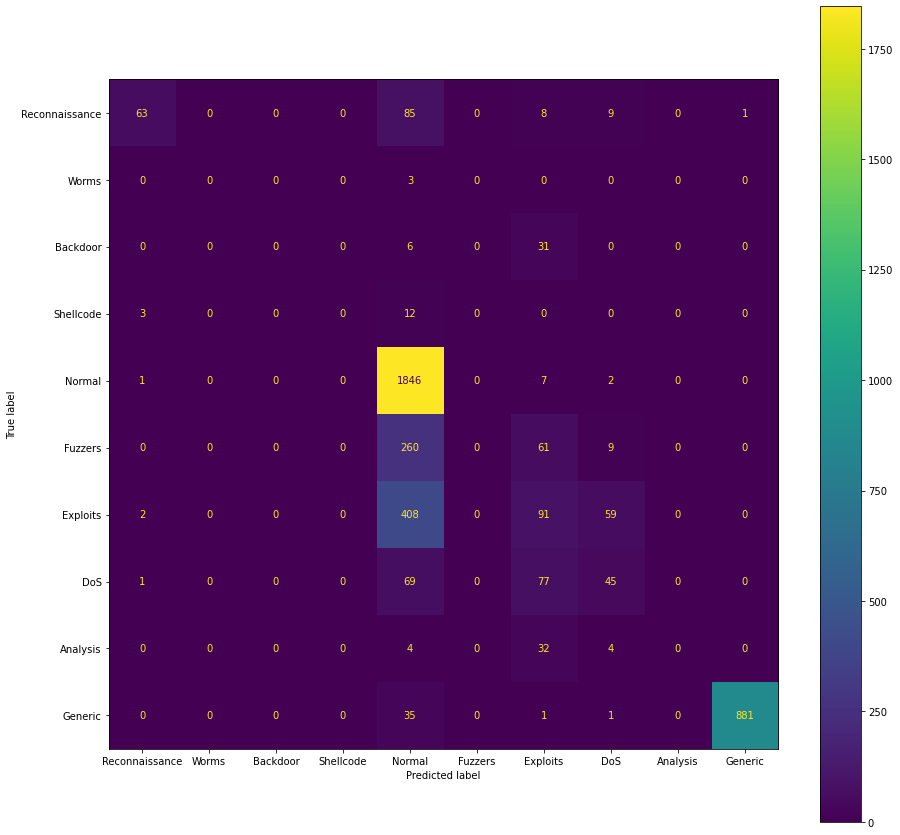

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

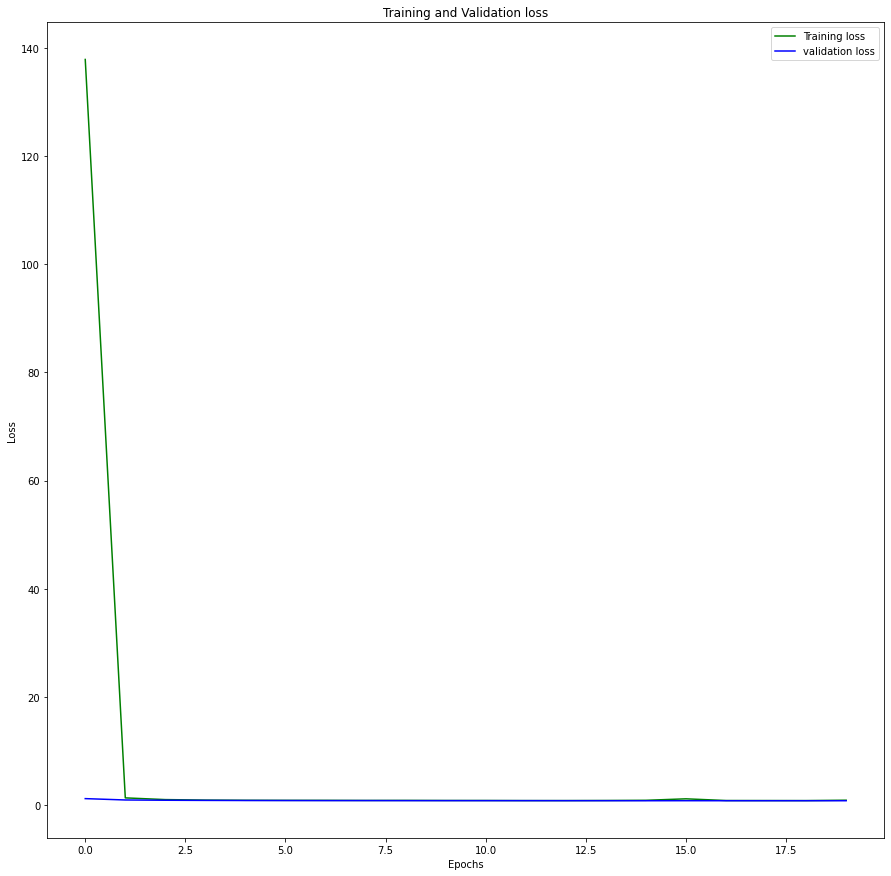

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(20)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

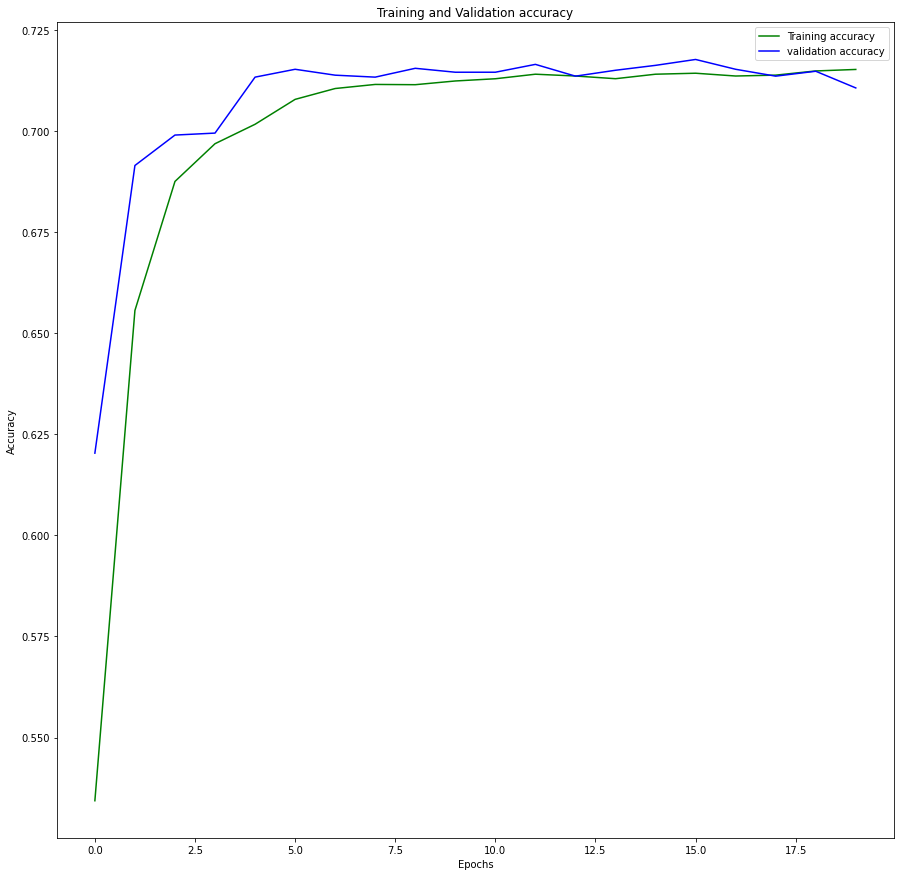

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(20)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.predict([X_test[0]]), Y_test[0]

(array([4]), 4)

In [ ]:
Y_pred = knn.predict(X_test)

print("Accuracy of K Nearest Neighbor Model:", knn.score(X_test, Y_test))
print("Precision Score of K Nearest Neighbor Model:", precision_score(Y_test, Y_pred, average="micro"))
print("Recall Score of K Nearest Neighbor Model:", recall_score(Y_test, Y_pred, average="micro"))

Accuracy of K Nearest Neighbor Model: 0.8304590721399077
Precision Score of K Nearest Neighbor Model: 0.8304590721399077
Recall Score of K Nearest Neighbor Model: 0.8304590721399077


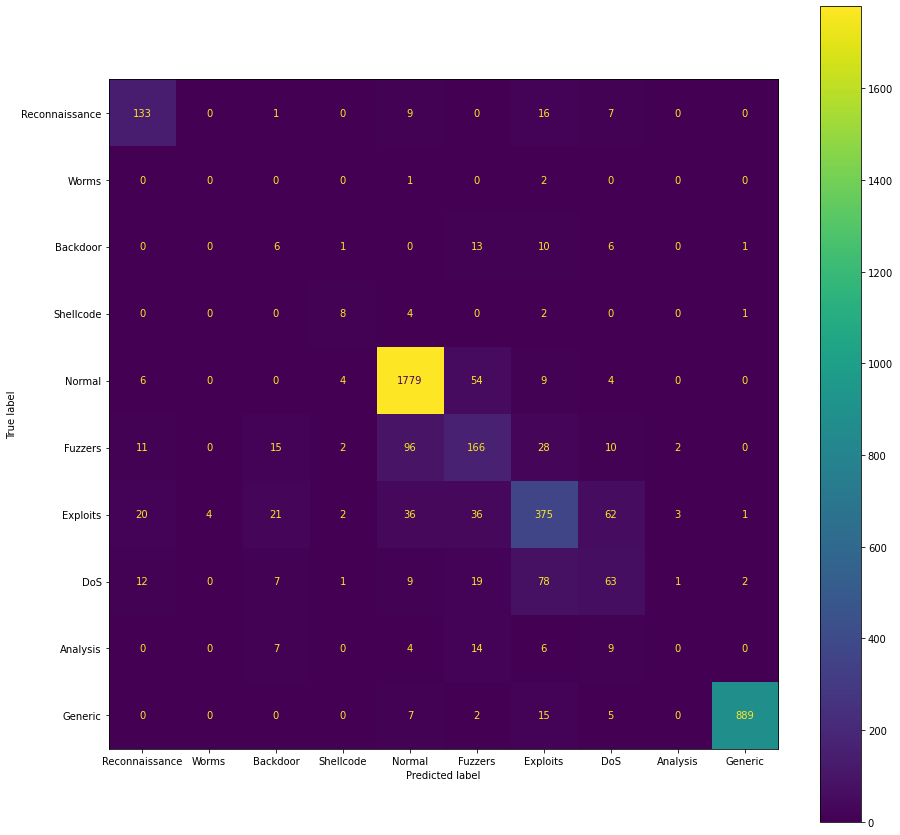

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

## Bagging (Ensemble Method)

In [ ]:
def predict(x):
    hm={}
    max_votes, res = 0, -1
    
    def change(model, max_votes, res):
        temp=model.predict([x])[0]
        hm[temp]=hm.get(temp,0)+1
        if hm[temp]>max_votes:
            res=temp
            max_votes=hm[temp]
            
        return max_votes, res
            
    for model in [log_reg, rf, dtc, svm_model, knn]:
        max_votes, res = change(model, max_votes, res)
        
    temp=np.argmax(ann.predict(np.array([x])))
    hm[temp]=hm.get(temp,0)+1
    if hm[temp]>max_votes:
        res=temp
        
    return res

In [ ]:
def calculate(X_test, Y_test):
    Y_pred=[]
    correct=0
    for i in range(len(X_test)):
        temp=predict(X_test[i])
        if temp==Y_test[i]:
            correct+=1
        Y_pred.append(temp)
        
    return Y_pred, correct/len(X_test)

In [ ]:
Y_pred, accuracy = calculate(X_test, Y_test)

print("Accuracy of Bagging:", accuracy)
print("Precision Score of Bagging:", precision_score(Y_test, Y_pred, average="micro"))
print("Recall Score of Bagging:", recall_score(Y_test, Y_pred, average="micro"))

Accuracy of Bagging: 0.8217148409035706
Precision Score of Bagging: 0.8217148409035706
Recall Score of Bagging: 0.8217148409035706


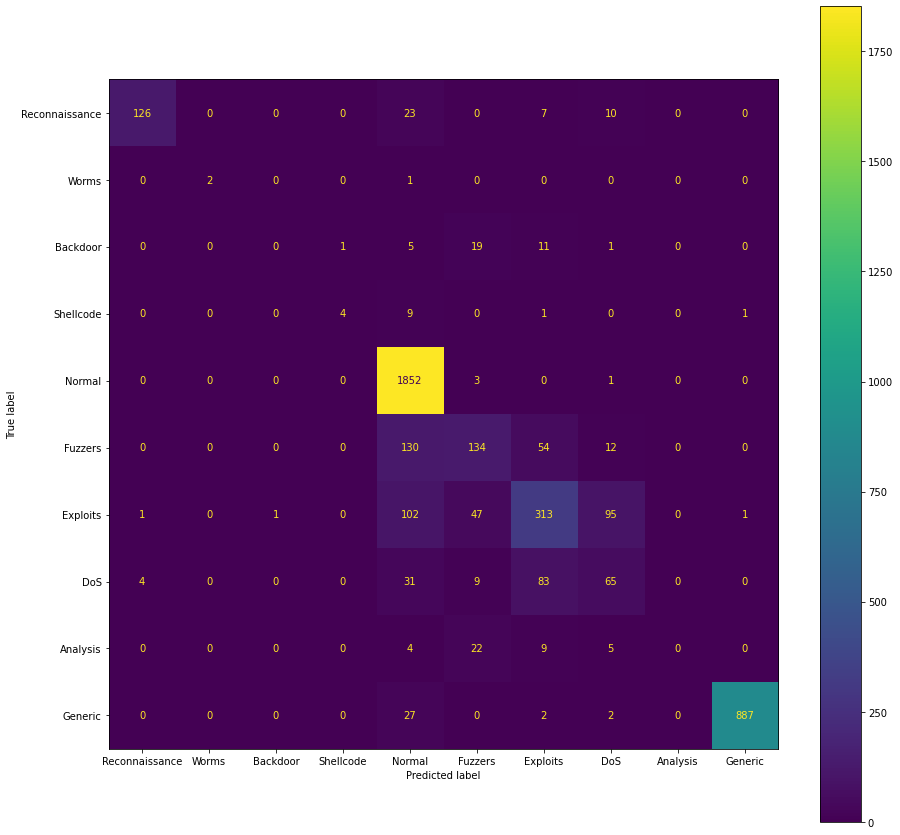

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=feature_class_attack_cat).plot()

In [ ]:
values=list(input("Enter values sbytes, sload, dmean, ct_dst_sport_ltm, dur, dttl, ct_dst_src_ltm, proto, ct_src_dport_ltm, dload, dinpkt, ct_src_ltm, tcprtt, smean, dbytes, rate, ct_srv_dst, ct_state_ttl, service, ct_srv_src, sttl, dpkts, ct_dst_ltm, sinpkt, synack ").split())

Enter values sbytes, sload, dmean, ct_dst_sport_ltm, dur, dttl, ct_dst_src_ltm, proto, ct_src_dport_ltm, dload, dinpkt, ct_src_ltm, tcprtt, smean, dbytes, rate, ct_srv_dst, ct_state_ttl, service, ct_srv_src, sttl, dpkts, ct_dst_ltm, sinpkt, synack 496 180363632 0 1 0.000011 0 2 udp 1 0 0 1 0 248 0 90909.0902 2 2 - 2 254 0 1 0.011 0


In [ ]:
def to_log(value):
  if value==0: return 0
  else: return math.log(value)

In [ ]:
# ["sbytes", "sload", "dload", "rate", "sinpkt"]
def refactor_values(values):
  res=[]
  for i in range(len(values)):
    if i in {0,1,9,15,23}:
      res.append(to_log(float(values[i])))
    elif i==7:
      res.append(hm_proto[values[i]])
    elif i==18:
      res.append(hm_service[values[i]])
    else:
      res.append(float(values[i]))

  return res

In [ ]:
refactored_values = refactor_values(values)

In [ ]:
prediction = feature_class_attack_cat[predict(refactored_values)]
print(prediction)

Normal


In [ ]:
prevention={
    "DoS": "Network traffic can be supervised via a firewall or intrusion detection system. Administrators can set up rules that create alerts for unusual traffic, identify traffic sources or drop network packets that meet a certain criteria.",
    "Exploits": "Strengthen security posture: This includes fortifying all internet-facing devices to prevent compromise, installing and maintaining antivirus software, establishing firewalls configured to protect against DoS attacks and following robust security practices to monitor and manage unwanted traffic.",
    "Worms": "Monitor traffic: Organizations can enroll in a service that detects or redirects the abnormal traffic flows typically associated with a DoS attack, while allowing normal traffic to proceed on the network.",
    "Generic": "Invest in a patch management system that will manage all software and system updates, keeping your system resilient and up to date.",
    'Reconnaissance': "Ensure Endpoint Protection: Endpoint protection protects networks that are remotely bridged to devices. Mobile devices, tablets and laptops that are connected to corporate networks give access paths to security threats. These paths need protected with specific endpoint protection software.",
    'Backdoor': "Putting your network behind a firewall is one of the most effective ways to defend yourself from any cyber attack. A firewall system will block any brute force attacks made on your network and/or systems before it can do any damage.",
    'Shellcode': "Believe it or not, one of the attacks that you can receive on your systems can be physical, having control over who can access your network is really really important. Somebody can simply walk into your office or enterprise and plug in a USB key containing infected files into one of your computers allowing them access to your entire network or infect it. It’s essential to control who has access to your computers. Having a perimeter security system installed is a very good",
    'Fuzzers': "Having managed admin rights and blocking your staff installing or even accessing certain data on your network is beneficial to your security.",
    'Analysis': "Having the same password setup for everything can be dangerous. Once a hacker figures out your password, they now have access to everything in your system and any application you use. Having different passwords setup for every application you use is a real benefit to your security, and changing them often will maintain a high level of protection against external and internal threats."
}

In [ ]:
if prediction!="Normal":
  print(prevention[prediction])